In [34]:
#Importing Libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import warnings
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
#pip install cufflinks

In [3]:
# Plotly for interactive plots
import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_white'

# Set display options for Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# tqdm for progress bars in pandas operations (if you use progress_apply)
from tqdm import tqdm
tqdm.pandas()

In [4]:
#pip install wordcloud

In [5]:
import re
from wordcloud import WordCloud

plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams['axes.titlesize'] = 16
plt.style.use('seaborn-whitegrid')
sns.set_palette('Set3')

In [6]:
import os

file_path = "C:/Users/aravi/OneDrive/Desktop/RIC/Online_Retail.csv"
file_exists = os.path.exists(file_path)
print(file_exists)


True


In [7]:
import pandas as pd

try:
    data = pd.read_csv('Online_Retail.csv', encoding='ISO-8859-1')
except UnicodeDecodeError:
    data = pd.read_csv('Online_Retail.csv', encoding='Windows-1252')

print(data.shape)
data.head()


(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [8]:
pd.set_option('display.max_columns', None) 
def data_overview(df, head=5):
    print(" SHAPE OF DATASET ".center(125,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    print(" HEAD ".center(125,'-'))
    print(df.head(head))
    print("DATA TYPES".center(125,'-'))
    print(data.dtypes.value_counts())
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending = False))
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())
    print(" STATISTICS OF DATA ".center(125,'-'))
    print(df.describe(include="all"))
    print("DATA INFO".center(125,'-'))
    print(df.info())
    
    
data_overview(data)

------------------------------------------------------ SHAPE OF DATASET -----------------------------------------------------
Rows:541909
Columns:8
------------------------------------------------------------ HEAD -----------------------------------------------------------
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/

Dealing with Missing values

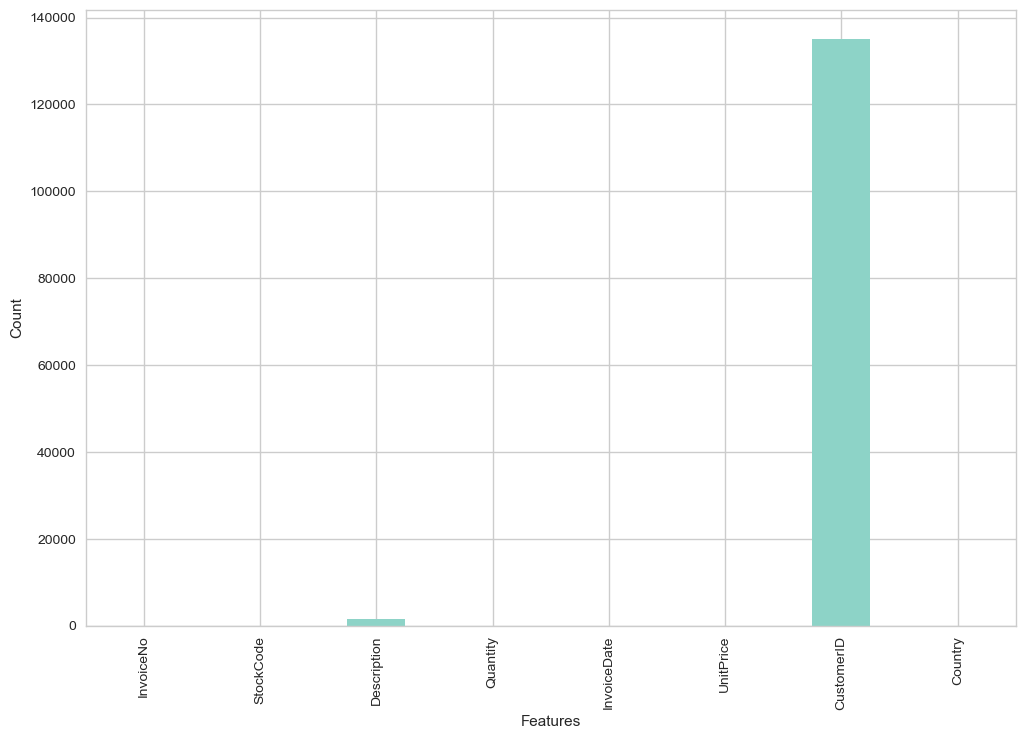

features,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
total_missing,0.0,0.0,1454.000000,0.0,0.0,0.0,135080.000000,0.0
percent,0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


In [9]:
missing = data.isna().sum().reset_index()
missing.columns = ['features', 'total_missing']
missing['percent'] = (missing['total_missing'] / len(data)) * 100
missing.index = missing['features']
del missing['features']

import matplotlib.pyplot as plt

missing['total_missing'].plot(kind='bar', title='')
plt.xlabel('Features')
plt.ylabel('Count')
plt.show()
missing.T

In [10]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
# Removing NaN's in CustomerID
print("Shape of data before removing NaN's in CustomerID", data.shape)
data.dropna(subset=['CustomerID'], axis=0, inplace=True)  # Corrected column name
print("Shape of data after removing NaN's in CustomerID", data.shape)

Shape of data before removing NaN's in CustomerID (541909, 8)
Shape of data after removing NaN's in CustomerID (406829, 8)


In [12]:
print("Missing values in each column after cleaning CustomerID :\n",data.isnull().sum())

Missing values in each column after cleaning CustomerID :
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Removing cancelled products from InvoiceNo

In [13]:
#using one's compliment operator (~) we can unselect all the Invoice column which doesnt contain "C".
data = data[~data.InvoiceNo.str.contains('C',na=False)]
print("Dataset is free from cancelled products information")

Dataset is free from cancelled products information


Removing Duplicates

In [14]:
# Removing duplicates (Values in all columns are identical)
print("Number of duplicates before cleaning:",data.duplicated().sum())
data = data.drop_duplicates(keep="first")
print("Number of duplicates after cleaning:",data.duplicated().sum())

Number of duplicates before cleaning: 5192
Number of duplicates after cleaning: 0


Checking for negative value

In [15]:
print("Negative value in Quantity is:",(data.Quantity<0).sum())
print("Negative value in UnitPrice is:",(data.UnitPrice<0).sum())

Negative value in Quantity is: 0
Negative value in UnitPrice is: 0


Cleaning Outliers

In [16]:
#defining funcation to remove outliers w.r.t its thresholds
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return up_limit, low_limit

def replace_with_threshold(dataframe, variable):
    up_limit, low_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

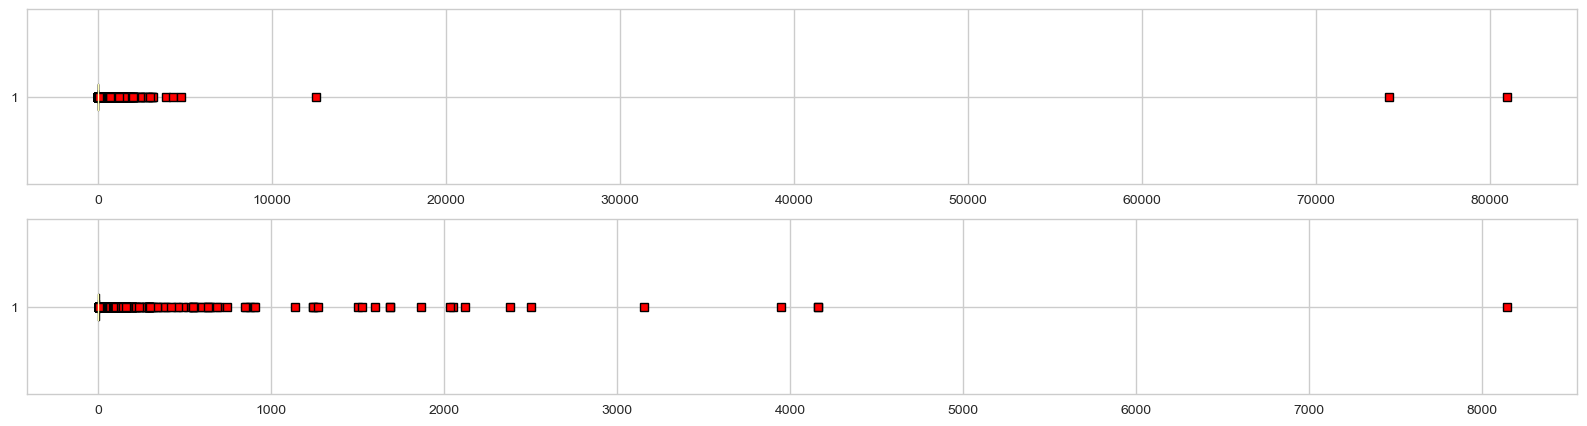

In [17]:
# Observing them before removing outliers.
f, ax = plt.subplots(2,1, figsize = (20,5))
col_list = ["Quantity","UnitPrice"]
for i in range(0,2):
    ax[i].boxplot(data[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

In [18]:
# Applying the functions for remove the outlier.
replace_with_threshold(data, "Quantity")
replace_with_threshold(data, "UnitPrice")

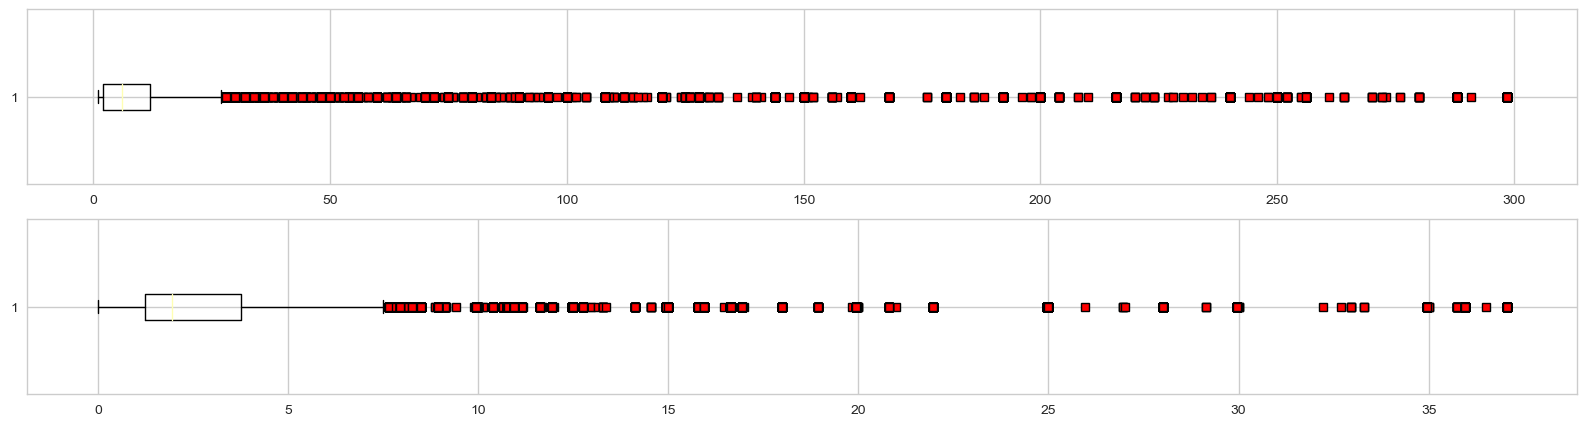

In [19]:
# Observing them after removing outliers.
f, ax = plt.subplots(2,1, figsize = (20,5))
for i in range(0,2):
    ax[i].boxplot(data[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

# Feature Engineering

In [20]:
#Creating new feature Revenue
data["Revenue"] = data["Quantity"] * data["UnitPrice"]

In [21]:
#Creating Features for RFM Model
#Changing data type to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [22]:
print("Max date :",data["InvoiceDate"].max())
print("Min date :",data["InvoiceDate"].min())#Creating Features for RFM Model
#Changing data type to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

Max date : 2011-12-09 12:50:00
Min date : 2010-12-01 08:26:00


In [23]:
#RFM Featuring
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09.
Latest_Date = dt.datetime(2011,12,10)

#Creating RFM features with subset of customerID
RFM = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 
                                                 'InvoiceNo': lambda x: x.nunique(), 
                                                 "Revenue": lambda x: x.sum()})
                                
RFM['InvoiceDate'] = RFM['InvoiceDate'].astype(int)

#Renaming column names to Recency, Frequency and Monetary
RFM.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Revenue': 'Monetary'}, inplace=True)

RFM.reset_index().head().style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"})

,CustomerID,Recency,Frequency,Monetary
0,12346.000000,325,1,310.440000
1,12347.000000,2,7,4310.000000
2,12348.000000,75,4,1770.780000
3,12349.000000,18,1,1491.720000
4,12350.000000,310,1,331.460000


Introducing New Feature : Interpurchase-Time

The Fourth varibale of RFM, InterPurchase Time, is a measure of average time gap between total shopping trips by a customer. The Interpurchase Time is calcluted as fallows :

T = L/(F-1) = (Tn - T1)/(F-1)

T --> Interpurchase Time

L --> Shopping Cycle

F --> Frequency

T1 --> First purchase

Tn --> Last purchase

Note: We consider only those customers who made purchase more than once.

In [24]:
RFM = RFM[(RFM["Frequency"]>1)]
RFM.head().style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"})

,Recency,Frequency,Monetary
CustomerID,,,
12347.000000,2,7,4310.000000
12348.000000,75,4,1770.780000
12352.000000,36,8,1756.340000
12356.000000,22,3,2811.430000
12358.000000,1,2,1150.420000


In [25]:
Shopping_Cycle = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: ((x.max() - x.min()).days)})

In [26]:
RFM["Shopping_Cycle"] = Shopping_Cycle
RFM.head().style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"})

,Recency,Frequency,Monetary,Shopping_Cycle
CustomerID,,,,
12347.000000,2,7,4310.000000,365
12348.000000,75,4,1770.780000,282
12352.000000,36,8,1756.340000,260
12356.000000,22,3,2811.430000,302
12358.000000,1,2,1150.420000,149


In [27]:
RFM["Interpurchase_Time"] = RFM["Shopping_Cycle"] // RFM["Frequency"]
RFMT = RFM[["Recency","Frequency","Monetary","Interpurchase_Time"]]
RFMT.head().style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"})

,Recency,Frequency,Monetary,Interpurchase_Time
CustomerID,,,,
12347.000000,2,7,4310.000000,52
12348.000000,75,4,1770.780000,70
12352.000000,36,8,1756.340000,32
12356.000000,22,3,2811.430000,100
12358.000000,1,2,1150.420000,74


RFMT Model is ready for segmentation

# Modelling with KMeans Algorithm

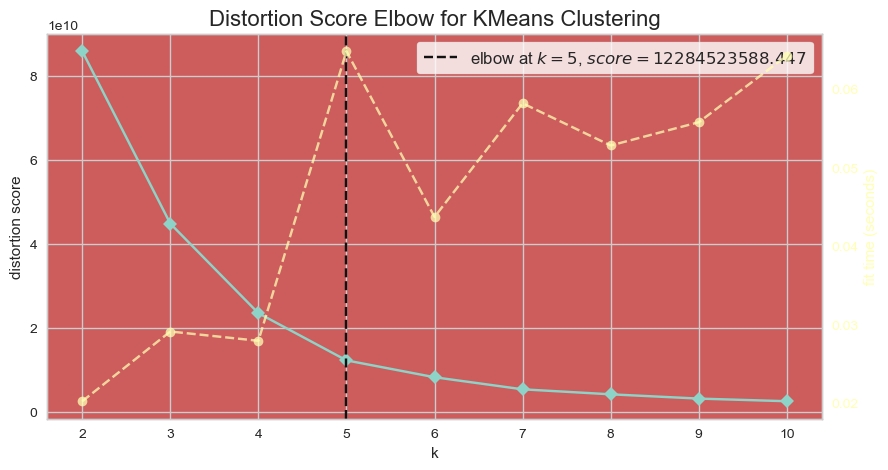

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# Finding initial K value using Elbow Method
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_facecolor("#cd5c5c")
Elbow_M = KElbowVisualizer(KMeans(), k=10) 
Elbow_M.fit(RFMT)
Elbow_M.show()

In [29]:
#Fitting KMeans Model
kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(RFMT)

KMeans(max_iter=50, n_clusters=4)

In [30]:
RFMT["Clusters"]=kmeans.labels_
RFMT.head().style.set_properties(**{"background-color": "#cd5c5c","color": "black", "border-color": "black"})

,Recency,Frequency,Monetary,Interpurchase_Time,Clusters
CustomerID,,,,,
12347.000000,2,7,4310.000000,52,0
12348.000000,75,4,1770.780000,70,0
12352.000000,36,8,1756.340000,32,0
12356.000000,22,3,2811.430000,100,0
12358.000000,1,2,1150.420000,74,0


# Evaluation

In [31]:
# how well the clusters are?:
#centriods
kmeans.cluster_centers_

array([[5.89719161e+01, 5.44258798e+00, 1.96866850e+03, 4.64504088e+01],
       [5.00000000e-01, 6.70000000e+01, 2.48873935e+05, 5.00000000e+00],
       [7.04000000e+00, 4.97600000e+01, 4.13244604e+04, 1.08000000e+01],
       [8.80000000e+00, 7.08000000e+01, 1.19436999e+05, 7.80000000e+00]])

<function matplotlib.pyplot.show(close=None, block=None)>

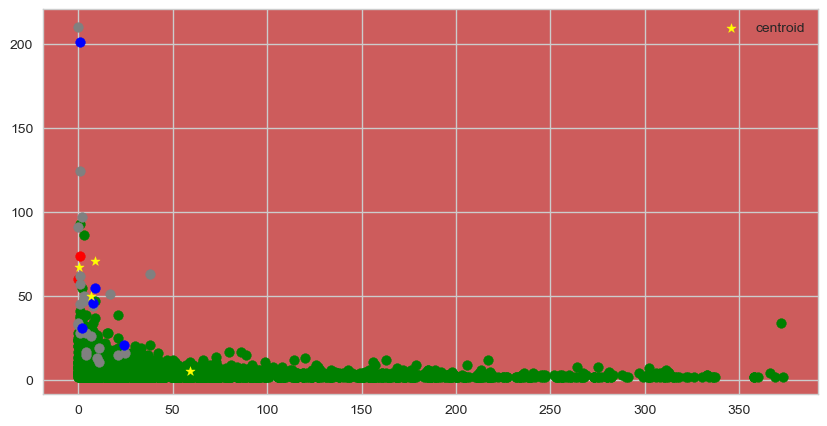

In [32]:
# grouping the data in accorandance with each cluster seperately
one = RFMT[RFMT["Clusters"]==0]
two = RFMT[RFMT["Clusters"]==1]
three = RFMT[RFMT["Clusters"]==2]
four = RFMT[RFMT["Clusters"]==3]

#Checking the quality of clustering in the data set
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_facecolor("#cd5c5c")
plt.scatter(one["Recency"],one["Frequency"],color='green')
plt.scatter(two["Recency"],two["Frequency"],color='red')
plt.scatter(three["Recency"],three["Frequency"],color='grey')
plt.scatter(four["Recency"],four["Frequency"],color='blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="yellow",marker="*",label="centroid")
plt.legend()
plt.show 

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. Score closer to 1, higher the cluster distinguished.

In [33]:
from sklearn.metrics import silhouette_score
print("Silhouette score :",silhouette_score(RFMT, kmeans.labels_, metric='euclidean'))

Silhouette score : 0.9386494916906333
